# Linear Regression

In [62]:
#Import Libraries
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import pylab 
import scipy.stats as stats

import sys
sys.path.append(r'..\functions')
import model_functions, EDA

In [69]:
from importlib import reload

reload(model_functions)
reload(EDA)

<module 'EDA' from '..\\functions\\EDA.py'>

# Teste de Premissas

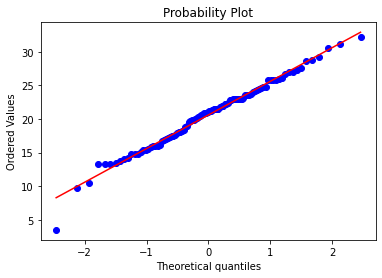

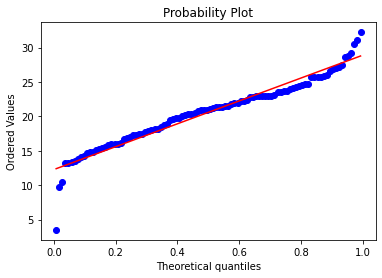

In [389]:
# Normalidade

measurements = np.random.normal(loc = 20, scale = 5, size=100)   
stats.probplot(measurements, dist="norm", plot=pylab)
plt.show()
stats.probplot(measurements, dist="uniform", plot=pylab)
plt.show()

In [396]:
print('Testando normal :\n',stats.kstest(np.random.normal(0,1,10000),'norm'))

print('Testando normal em distribuição uniforme:\n',stats.kstest(np.random.uniform(0,1,10000),'norm'))

Testando normal :
 KstestResult(statistic=0.004836481141173188, pvalue=0.9725760104288678)
Testando normal em distribuição uniforme:
 KstestResult(statistic=0.5000569206045574, pvalue=0.0)


In [397]:
import numpy as np
import scipy.stats as stats

mu = 0.3
sigma = 5

num_tests = 10**3
num_rejects = 0
alpha = 0.05
for i in range(num_tests):
    data = np.random.normal(mu, sigma, 10000)
    # normed_data = (data - mu) / sigma    # this is okay
    # 4915/100000 = 0.05 rejects at rejection level 0.05 (as expected)
    normed_data = (data - data.mean()) / data.std()    # this is NOT okay
    # 20/100000 = 0.00 rejects at rejection level 0.05 (not expected)
    D, pval = stats.kstest(normed_data, 'norm')
    if pval < alpha:
        num_rejects += 1
ratio = float(num_rejects) / num_tests

print('{}/{} = {:.2f} rejects at rejection level {}'.format(
    num_rejects, num_tests, ratio, alpha))     

0/1000 = 0.00 rejects at rejection level 0.05


# Case 0 - Salary Prediction

In [264]:
#Import data
dataset=pd.read_csv(r'../Data/Salary_Data.csv')
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

# Splitting training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=1/3, random_state=0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)

In [265]:
from sklearn.linear_model import LinearRegression

In [266]:
lin=LinearRegression()
y_pred= lin.fit(X_train, y_train).predict(X_test)

In [267]:
y_val= X*lin.coef_[0]+lin.intercept_

y_val=y_val.reshape(1,-1)[0]

cost=np.sum((y-y_val)**2)/len(y_val)
cost

16166420480.30301

In [268]:
#SCORE: Return the coefficient of determination R^2 of the prediction.

print('test_score:',lin.score(X_test,y_test))
print('train_score:',lin.score(X_train, y_train))
print('dataset_score:',lin.score(X, y))

test_score: 0.9749154407708353
train_score: 0.9381900012894278
dataset_score: -21.252494024194906


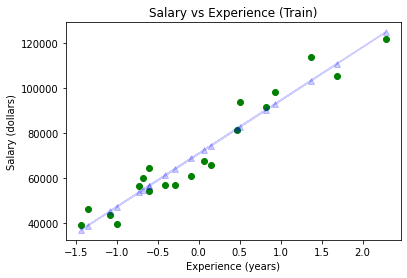

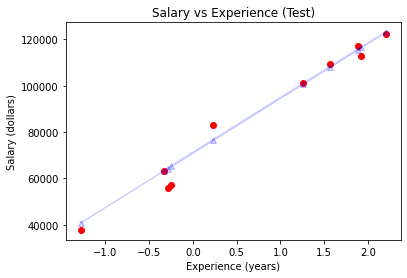

In [270]:
plt.scatter(X_train, y_train, color='green')
plt.plot(X_train, lin.predict(X_train), marker='^', alpha=0.2, color='blue')
plt.title('Salary vs Experience (Train)')
plt.xlabel('Experience (years)')
plt.ylabel('Salary (dollars)')
plt.show()

plt.scatter(X_test, y_test, color='red')
plt.plot(X_test, lin.predict(X_test), marker='^', alpha=0.2, color='blue')
plt.title('Salary vs Experience (Test)')
plt.xlabel('Experience (years)')
plt.ylabel('Salary (dollars)')
plt.show()

In [ ]:
# line=np.arange(0,12,0.1)
# y_val= line*lin.coef_[0]+lin.intercept_

# plt.plot(X,y,'o')
# plt.plot(line, y_val)
# plt.plot(X_test, y_test, 'v')
# plt.xlabel('ID person')
# plt.ylabel('Salary')

In [274]:
print('Sklearn score (lin. reg.):', lin.score(X_test, y_test))
SSres=np.sum((y_test-lin.predict(X_test))**2)
SStot=np.sum((y_test-np.mean(y_test)*np.ones(len(y_test)))**2)

R_sq=np.sqrt(1-SSres/SStot)
print('calculated R²:',R_sq)

Sklearn score (lin. reg.): 0.9749154407708353
calculated R²: 0.9873780637480434


# Case 2 - Multiple Linear Regression

5 methods of building models:
    
 - All-in 
 - Backward Elimination 
 - Forward Selection
 - Bidirectional Elimination
 - Score Comparison

In [409]:
#Import Libraries
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [410]:
import warnings
warnings.filterwarnings("ignore")

In [448]:
#Import data
dataset=pd.read_csv(r'../Data/50_Startups.csv')
target='Profit'
X=dataset.drop(columns=target)
y=dataset[target]

In [412]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


<AxesSubplot:xlabel='Profit', ylabel='Count'>

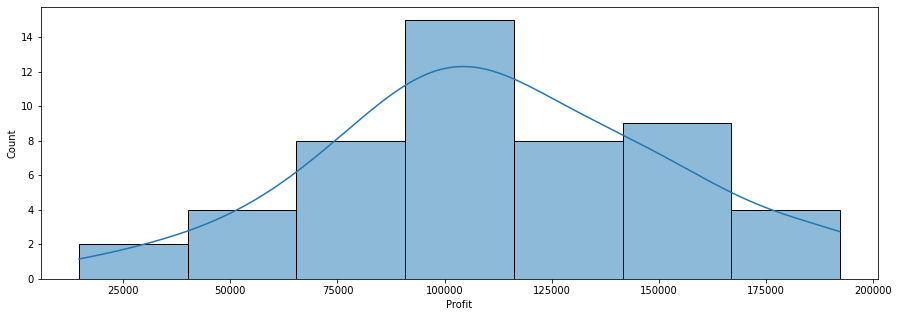

In [413]:
fig, axes= plt.subplots(1,1,figsize=(15,5))
sns.histplot(data=dataset, x=target, kde=True)

In [423]:
teste=stats.kstest(dataset[target],'norm')
print('Testando normalidade variavel resposta :\n',teste)

if teste.pvalue<0.05:
    print('rejeita-se H0 - não há evidencias estatísticas de normalidade')
else:
    print('Não rejeita-se H0 - a distribuição é normal')

Testando normalidade variavel resposta :
 KstestResult(statistic=1.0, pvalue=0.0)
rejeita-se H0 - não há evidencias estatísticas de normalidade


((array([-2.20385432, -1.83293478, -1.61402323, -1.45296849, -1.32267759,
         -1.21163342, -1.113805  , -1.02561527, -0.94475674, -0.86964726,
         -0.79915021, -0.73241807, -0.66879925, -0.6077796 , -0.54894415,
         -0.49195112, -0.43651377, -0.38238727, -0.32935914, -0.27724191,
         -0.2258675 , -0.17508277, -0.12474591, -0.07472335, -0.02488719,
          0.02488719,  0.07472335,  0.12474591,  0.17508277,  0.2258675 ,
          0.27724191,  0.32935914,  0.38238727,  0.43651377,  0.49195112,
          0.54894415,  0.6077796 ,  0.66879925,  0.73241807,  0.79915021,
          0.86964726,  0.94475674,  1.02561527,  1.113805  ,  1.21163342,
          1.32267759,  1.45296849,  1.61402323,  1.83293478,  2.20385432]),
  array([ 14681.4 ,  35673.41,  42559.73,  49490.75,  64926.08,  65200.33,
          69758.98,  71498.49,  77798.83,  78239.91,  81005.76,  81229.06,
          89949.14,  90708.19,  96479.51,  96712.8 ,  96778.92,  97427.84,
          97483.56,  99937.59, 10

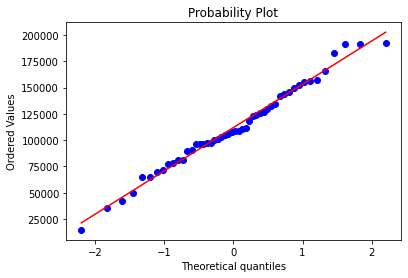

In [415]:
stats.probplot(dataset[target], dist="norm", plot=pylab)

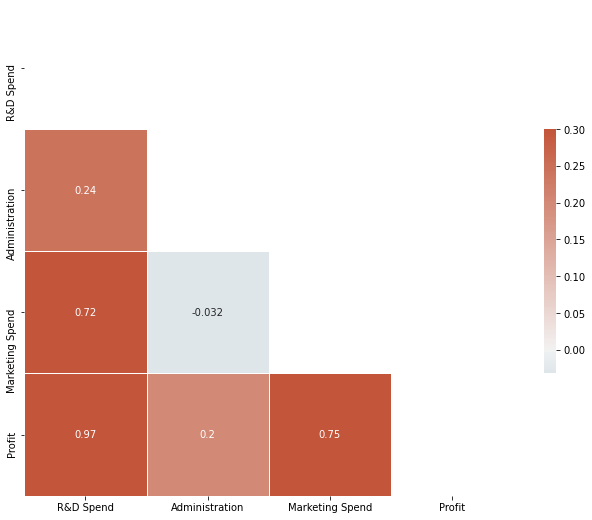

In [416]:
EDA.print_correlation_matrix(dataset)

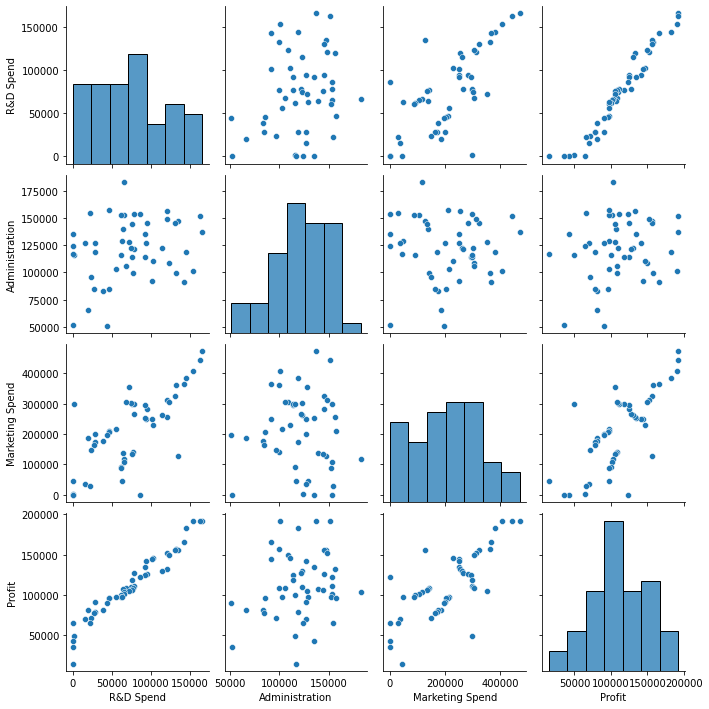

In [449]:
sns.pairplot(dataset)

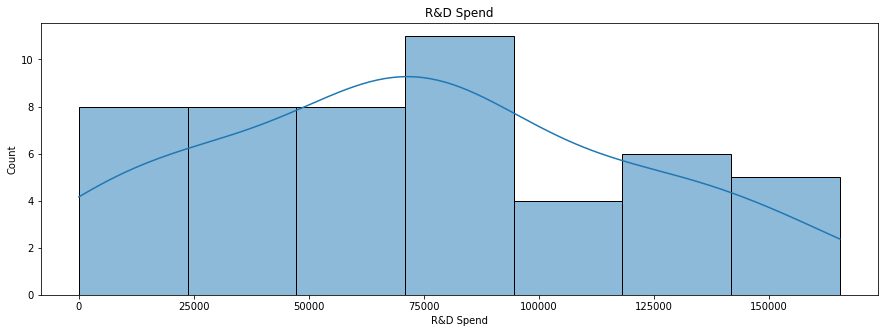

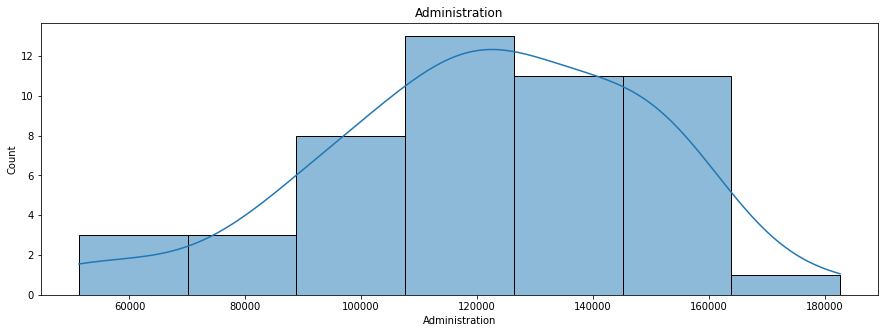

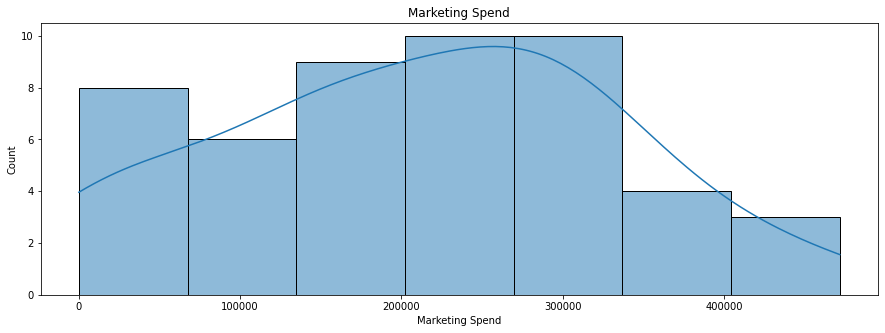

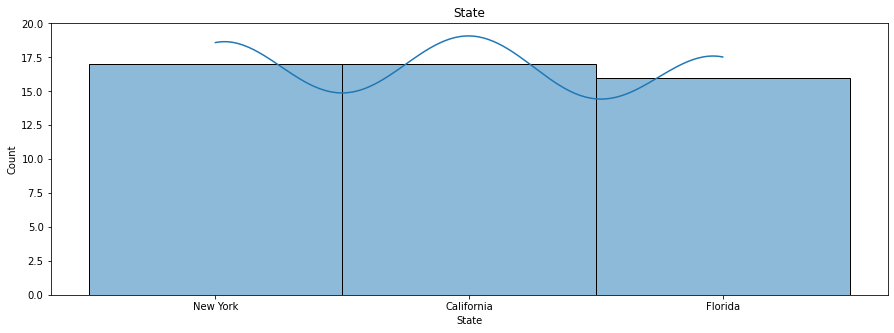

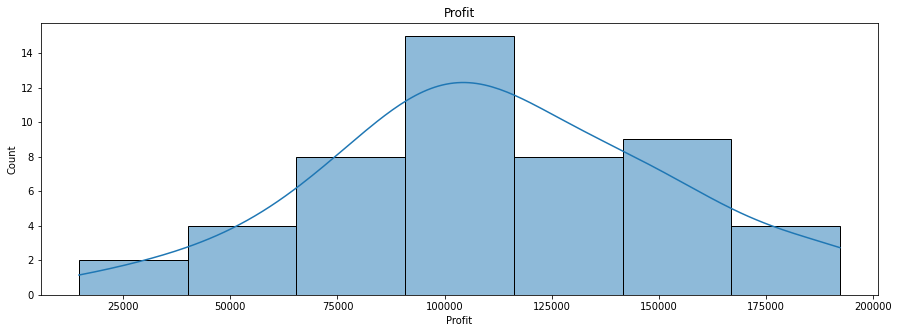

In [417]:
import seaborn as sns

for column in dataset.columns:
    fig, axes= plt.subplots(1,1,figsize=(15,5))
    sns.histplot(data=dataset, x=column, kde=True)
#     dataset[column].hist(ax=axes)
    axes.set_title(column)

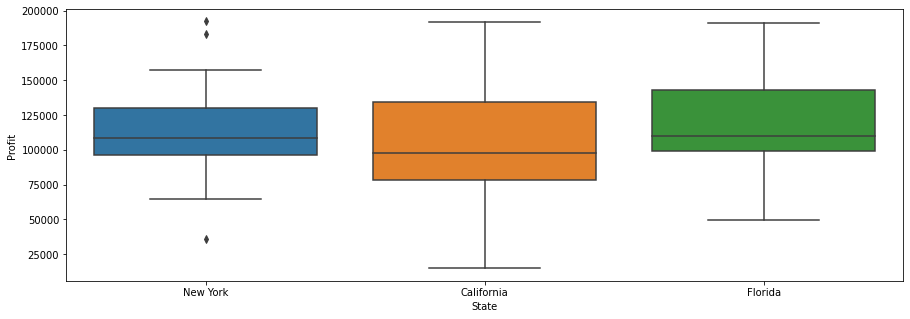

In [418]:
fig, axes= plt.subplots(1,1,figsize=(15,5))
sns.boxplot(data=dataset, x='State',y=target);

In [425]:
# Categorical boolean mask
categorical_feature_mask = dataset.dtypes==object

# filter categorical columns using mask and turn it into a list
categorical_cols = dataset.columns[categorical_feature_mask].tolist()

# import OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

In [426]:
for column in categorical_cols:
    print('Enconding:',column)
    ohe = OneHotEncoder(categories = 'auto', sparse=False, handle_unknown='ignore') 
    ohe.fit(dataset[[column]])
    aux = pd.DataFrame(ohe.fit_transform(dataset[[column]]),
                       columns=list(np.array(ohe.categories_)[0])).add_prefix(column + '_')
    dataset.drop(columns=column,inplace=True)
    dataset = pd.concat([dataset, aux], axis=1)


In [427]:
target = 'Profit'
X=dataset.drop(columns=target)
y=dataset[target]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=1/3, random_state=0)

print('X_train shape:{}'.format(X_train.shape))
print('y_train shape:{}'.format(y_train.shape))
print('X_test shape:{}'.format(X_test.shape))
print('y_test shape:{}'.format(y_test.shape))

X_train shape:(33, 6)
y_train shape:(33,)
X_test shape:(17, 6)
y_test shape:(17,)


In [428]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.preprocessing import MinMaxScaler

# scaler = StandardScaler()
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train = pd.DataFrame(scaler.transform(X_train), columns = X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns = X_train.columns)

In [429]:
regressor=LinearRegression()
regressor.fit(X_train, y_train)
y_pred=regressor.predict(X_test)

print('test_score:',regressor.score(X_train, y_train))
print('train_score:',regressor.score(X_test, y_test))
print('data_score:',regressor.score(X, y))

test_score: 0.9576035764205424
train_score: 0.8752655285748306
data_score: -137959562353.98065


In [430]:
pd.DataFrame(model_functions.metrics(regressor, 'regression', X_train, X_test, y_train, y_test))


### TREINO:###

explained_variance:  0.9576
mean_squared_log_error:  0.0484
MAE:  6561.2657
MSE:  79705549.2451
RMSE:  8927.7964
Median Absolute Error:  4642.0561
r2:  0.9576

### TESTE:###

explained_variance:  0.8809
mean_squared_log_error:  0.0099
MAE:  9287.853
MSE:  118348525.6696
RMSE:  10878.8109
Median Absolute Error:  8935.5047
r2:  0.8753


,train,test
explained_variance,9.576036e-01,8.808663e-01
mslogerror,4.836162e-02,9.878016e-03
mae,6.561266e+03,9.287853e+03
mse,7.970555e+07,1.183485e+08
rmse,8.927796e+03,1.087881e+04
median_abs_error,4.642056e+03,8.935505e+03
r2,9.576036e-01,8.752655e-01


In [431]:
# fig, axes= plt.subplots(1,3,figsize=(15,5))

# for i,ax in zip(range(0,3),axes):
#     line=np.arange(min(X.iloc[:,i]),max(X.iloc[:,i]),0.1)
#     y_val= line*lin.coef_[i]+lin.intercept_
#     ax.plot(X.iloc[:,i],y.values,'o')
# #     ax.plot(line, y_val)
#     ax.plot(X_test.iloc[:,i], y_test, 'v')
#     ax.set_xlabel(dataset.columns[i])
#     ax.set_ylabel(target)
    
# plt.tight_layout()

In [432]:
coefs_ = pd.DataFrame({'variavel':X.columns,'coef':regressor.coef_})

print('intercepto:',lin.intercept_)
coefs_

intercepto: 71022.5


,variavel,coef
0,R&D Spend,136970.645957
1,Administration,5217.273668
2,Marketing Spend,10467.092896
3,State_California,-1862.800850
4,State_Florida,4063.832956
5,State_New York,-2201.032106


Text(0.5, 1.0, 'Histograma')

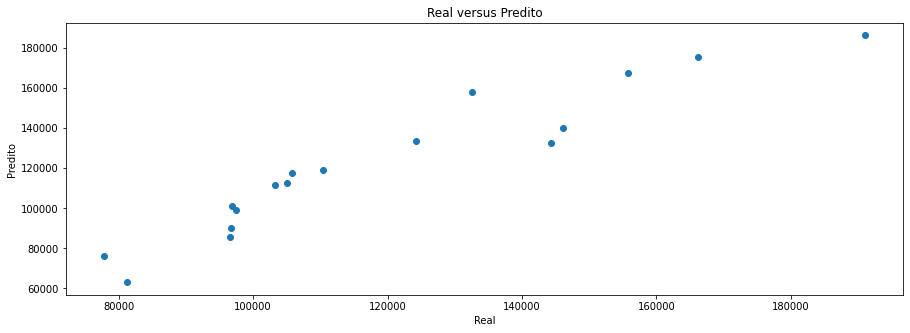

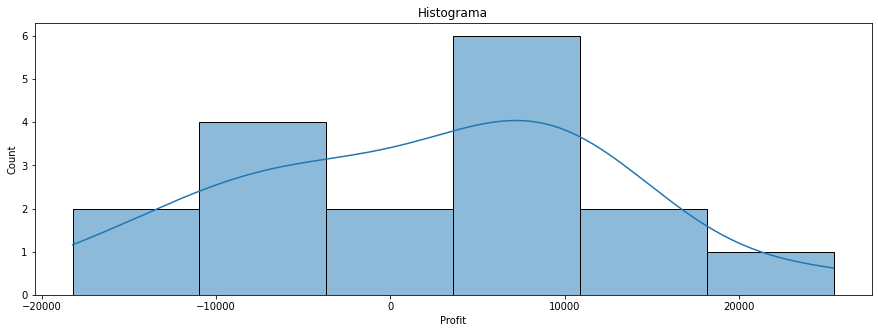

In [441]:
fig, axes= plt.subplots(1,1,figsize=(15,5))
plt.scatter(y_test,y_pred)
plt.xlabel('Real')
plt.ylabel('Predito')
plt.title('Real versus Predito')

residuos = y_pred - y_test
fig, axes= plt.subplots(1,1,figsize=(15,5))
sns.histplot(residuos, kde=True)
plt.title('Histograma resíduos')


Text(0.5, 1.0, 'Resíduo versus Predito')

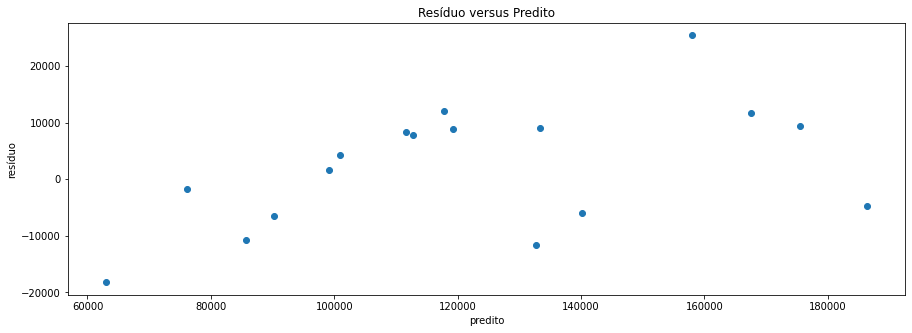

In [446]:
fig, axes= plt.subplots(1,1,figsize=(15,5))
plt.scatter(y_pred, residuos)
# plt.scatter(y_test, residuos)
plt.xlabel('predito')
plt.ylabel('resíduo')
plt.title('Resíduo versus Predito')



# Using Backward Elimination on Regression

    -Select a significance level, say 5% (0.05)
    -Fit a model with all features (variables)
    -Consider the feature with the highest P-Value. If its P-value is greater than significance level (P > SL), go to step 4. Else, your model is ready.
    -Eliminate this feature (variable).
    -Fit a model with the new set of features, and go to step 3.

P value is a statistical measure that helps scientists determine whether or not their hypotheses are correct. P values are used to determine whether the results of their experiment are within the normal range of values for the events being observed. Usually, if the P value of a data set is below a certain pre-determined amount (like, for instance, 0.05), scientists will reject the "null hypothesis" of their experiment - in other words, they'll rule out the hypothesis that the variables of their experiment had no meaningful effect on the results.

The purpose of finding a p-value is basically to determine whether the observed results differ from the expected results to such a degree that the "null hypothesis" - the hypothesis that there is no relationship between the experimental variable(s) and the observed results - is unlikely enough to reject

In [359]:
import statsmodels.regression.linear_model as sm

In [360]:
X_opt = np.array(X_train)
y_opt =np.array(y_train)

reg_OLS=sm.OLS(endog=y_opt, exog=X_opt).fit()

In [361]:
pd.DataFrame([('x_'+str(i+1), column) 
              for i, column 
              in enumerate(X_train.columns)], 
             columns=['variavel', 'nome']).set_index('variavel')

,nome
variavel,
x_1,R&D Spend
x_2,Administration
x_3,Marketing Spend
x_4,State_California
x_5,State_Florida
x_6,State_New York


In [362]:
reg_OLS.summary(xname=X_train.columns.to_list())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     122.0
Date:                Sun, 25 Jul 2021   Prob (F-statistic):           1.18e-17
Time:                        11:42:27   Log-Likelihood:                -347.02
No. Observations:                  33   AIC:                             706.0
Df Residuals:                      27   BIC:                             715.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
R&D Spend          1.37e+05   1.01e+04     13.580      0.000    1.16e+05    1.58e+05
Administration    5217.2737   7596.063      0.687      0.498   -1.04e+04    2.08e+04
Marketing Spend   1.047e+04   9842.285      1.063      0.297   -9727.607    3.07e+04
State_California  4.173e+04   5744.720      7.265      0.000    2.99e+04    5.35e+04
State_Florida     4.766e+04   7311.322      6.519      0.000    3.27e+04    6.27e+04
State_New York    4.139e+04   6193.627      6.683      0.000    2.87e+04    5.41e+04
==============================================================================
Omnibus:                       13.089   Durbin-Watson:                   2.107
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               16.973
Skew:                          -0.992   Prob(JB):                     0.000206
Kurtosis:                       5.899   Cond. No.                         9.84
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [367]:
# Administrarion tem o maior pvalor
X_opt = X_train.drop(columns='Administration')

reg_OLS=sm.OLS(endog=y, exog=X_opt.values).fit()
reg_OLS.summary(xname=X_opt.columns.to_list())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     155.3
Date:                Sun, 25 Jul 2021   Prob (F-statistic):           1.11e-18
Time:                        11:43:57   Log-Likelihood:                -347.31
No. Observations:                  33   AIC:                             704.6
Df Residuals:                      28   BIC:                             712.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
R&D Spend         1.396e+05   9234.445     15.119      0.000    1.21e+05    1.59e+05
Marketing Spend   8748.8097   9428.809      0.928      0.361   -1.06e+04    2.81e+04
State_California  4.483e+04   3519.366     12.739      0.000    3.76e+04     5.2e+04
State_Florida     5.106e+04   5327.965      9.584      0.000    4.01e+04     6.2e+04
State_New York    4.454e+04   4124.054     10.801      0.000    3.61e+04     5.3e+04
==============================================================================
Omnibus:                       11.729   Durbin-Watson:                   2.154
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               14.106
Skew:                          -0.918   Prob(JB):                     0.000865
Kurtosis:                       5.625   Cond. No.                         6.68
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [368]:
# Marketing Spend é o próximo
X_opt =X_opt.drop(columns='Marketing Spend')

reg_OLS=sm.OLS(endog=y, exog=X_opt.values).fit()
reg_OLS.summary(xname=X_opt.columns.to_list())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     207.7
Date:                Sun, 25 Jul 2021   Prob (F-statistic):           1.07e-19
Time:                        11:43:58   Log-Likelihood:                -347.81
No. Observations:                  33   AIC:                             703.6
Df Residuals:                      29   BIC:                             709.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
R&D Spend         1.461e+05   5996.936     24.366      0.000    1.34e+05    1.58e+05
State_California   4.56e+04   3411.859     13.366      0.000    3.86e+04    5.26e+04
State_Florida     5.331e+04   4733.084     11.263      0.000    4.36e+04     6.3e+04
State_New York    4.502e+04   4082.113     11.029      0.000    3.67e+04    5.34e+04
==============================================================================
Omnibus:                       10.539   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               11.423
Skew:                          -0.879   Prob(JB):                      0.00331
Kurtosis:                       5.284   Cond. No.                         3.53
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Resultado:** Removeram-se duas variáveis usando backward selection, e R² mudou muito pouco 

In [382]:
import statsmodels.regression.linear_model as sm
def backwardElimination(x,y, sl):    
    numVars = len(x.columns.to_list())
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(y.values, x.values).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    print("the variable {} has SL value of {:.4f} which is bigger than 0.05\n".format(x.columns[j],maxVar))
                    x = x.drop(columns= x.columns[j])
    print(regressor_OLS.summary(xname=x.columns.to_list()))
    return x
 
SL = 0.05
X_opt = X_train
y = y_train
X_Modeled = backwardElimination(X_opt,y,  SL)

the variable Administration has SL value of 0.4980 which is bigger than 0.05

the variable Marketing Spend has SL value of 0.3614 which is bigger than 0.05

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     207.7
Date:                Sun, 25 Jul 2021   Prob (F-statistic):           1.07e-19
Time:                        11:55:41   Log-Likelihood:                -347.81
No. Observations:                  33   AIC:                             703.6
Df Residuals:                      29   BIC:                             709.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t    

# Case 3 - Regressão Múltipla em Diabetes

In [519]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
load_df = datasets.load_diabetes()
dataset = pd.concat([pd.DataFrame(load_df.data,columns = load_df.feature_names)
                     ,pd.DataFrame(load_df.target,columns = ['target'])], axis=1)

In [501]:
dataset.shape

(442, 11)

<AxesSubplot:xlabel='target', ylabel='Count'>

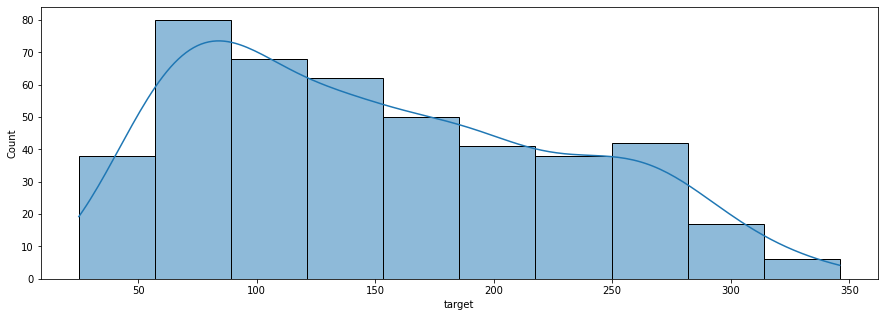

In [456]:
fig, axes= plt.subplots(1,1,figsize=(15,5))
sns.histplot(data=dataset, x='target', kde=True)

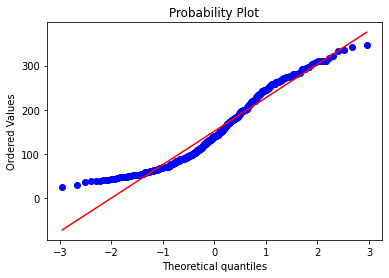

In [460]:
stats.probplot(dataset['target'], dist="norm", plot=pylab);

In [462]:
teste=stats.kstest(dataset['target'],'norm')
print('Testando normalidade variavel resposta :\n',teste)

if teste.pvalue<0.05:
    print('rejeita-se H0 - não há evidencias estatísticas de normalidade')
else:
    print('Não rejeita-se H0 - a distribuição é normal')

Testando normalidade variavel resposta :
 KstestResult(statistic=1.0, pvalue=0.0)
rejeita-se H0 - não há evidencias estatísticas de normalidade


In [520]:
dataset.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


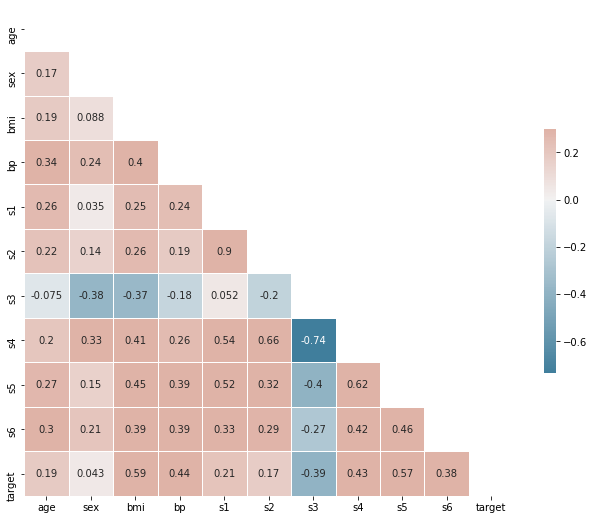

In [508]:
EDA.print_correlation_matrix(dataset)

In [522]:
X=dataset.drop(columns='target')
y=dataset['target']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=1/3, random_state=0)

print('X_train shape:{}'.format(X_train.shape))
print('y_train shape:{}'.format(y_train.shape))
print('X_test shape:{}'.format(X_test.shape))
print('y_test shape:{}'.format(y_test.shape))

X_train shape:(294, 10)
y_train shape:(294,)
X_test shape:(148, 10)
y_test shape:(148,)


In [523]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.preprocessing import MinMaxScaler

# scaler = StandardScaler()
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train = pd.DataFrame(scaler.transform(X_train), columns = X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns = X_train.columns)

In [525]:
X_est.head()

NameError: name 'X_est' is not defined

In [511]:
reg_OLS=sm.OLS(endog=y_train.values, exog=X_train.values).fit()
reg_OLS.summary(xname=X_train.columns.to_list())

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.905
Model:                            OLS   Adj. R-squared (uncentered):              0.902
Method:                 Least Squares   F-statistic:                              271.4
Date:                Sun, 25 Jul 2021   Prob (F-statistic):                   5.49e-139
Time:                        19:34:18   Log-Likelihood:                         -1582.4
No. Observations:                 294   AIC:                                      3185.
Df Residuals:                     284   BIC:                                      3222.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age           -8.7406     15.634     -0.559      0.577     -39.513      22.032
sex          -17.7971      6.933     -2.567      0.011     -31.444      -4.150
bmi          150.4041     20.665      7.278      0.000     109.728     191.081
bp            69.3222     20.024      3.462      0.001      29.907     108.737
s1          -182.1399     55.891     -3.259      0.001    -292.153     -72.127
s2           123.7440     67.041      1.846      0.066      -8.217     255.705
s3             5.0750     23.135      0.219      0.827     -40.464      50.614
s4            19.1590     43.137      0.444      0.657     -65.749     104.067
s5           207.1807     31.211      6.638      0.000     145.746     268.615
s6            10.6194     21.112      0.503      0.615     -30.936      52.175
==============================================================================
Omnibus:                        1.713   Durbin-Watson:                   1.941
Prob(Omnibus):                  0.425   Jarque-Bera (JB):                1.492
Skew:                           0.011   Prob(JB):                        0.474
Kurtosis:                       2.652   Cond. No.                         40.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [482]:
SL = 0.05
X_opt = X_train
y = y_train
X_Modeled = backwardElimination(X_opt,y,  SL)

the variable s3 has SL value of 0.8265 which is bigger than 0.05

the variable s4 has SL value of 0.6800 which is bigger than 0.05

the variable s6 has SL value of 0.5771 which is bigger than 0.05

the variable age has SL value of 0.6204 which is bigger than 0.05

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.905
Model:                            OLS   Adj. R-squared (uncentered):              0.903
Method:                 Least Squares   F-statistic:                              457.4
Date:                Sun, 25 Jul 2021   Prob (F-statistic):                   5.16e-144
Time:                        19:28:04   Log-Likelihood:                         -1582.8
No. Observations:                 294   AIC:                                      3178.
Df Residuals:                     288   BIC:                                      3200.
Df Model:                      

In [512]:
X_train = X_train[X_Modeled.columns.to_list()]
X_test = X_test[X_Modeled.columns.to_list()]

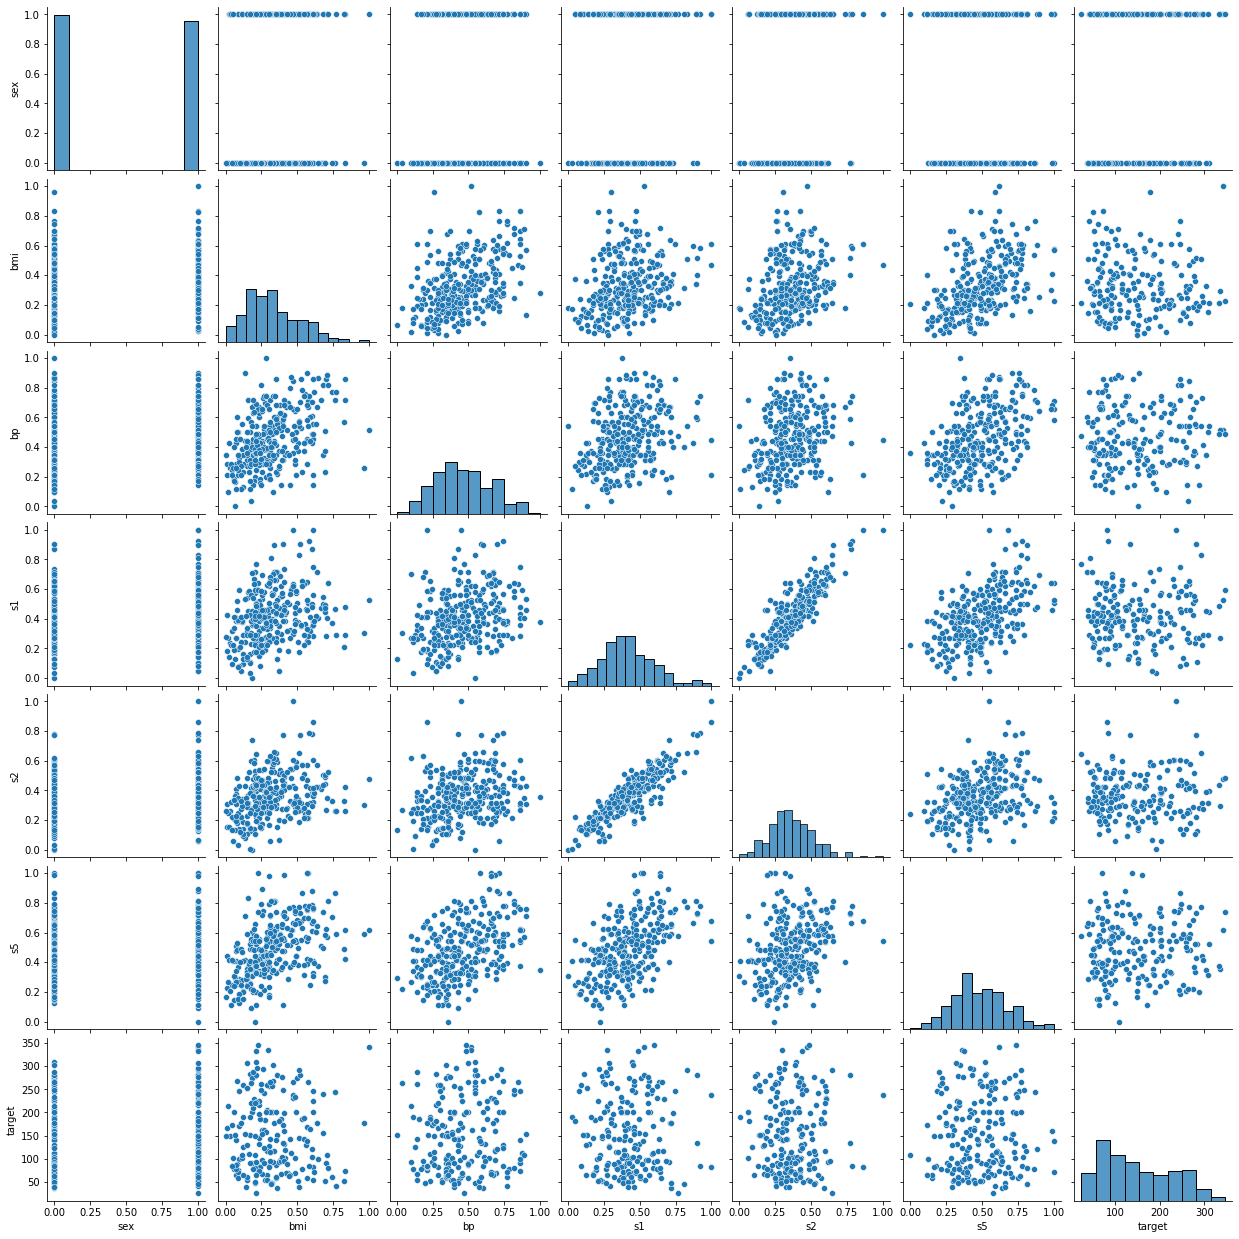

In [513]:
sns.pairplot(pd.concat([X_train, y_train], axis=1))

In [514]:
regressor=LinearRegression()
regressor.fit(X_train, y_train)
y_pred=regressor.predict(X_test)

print('test_score:',regressor.score(X_train, y_train))
print('train_score:',regressor.score(X_test, y_test))

test_score: 0.5579407486499945
train_score: 0.4005181624179974
